#Pre-process the Data and Split into Train and Test Sets:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("breast-cancer-wisconsin.data%20%281%29.txt", delimiter=",")
df.info() #Use this to inspect the meta-data to identify the columns with  bad data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    699 non-null    int64 
 1   clump_thickness       699 non-null    int64 
 2   uniform_cell_size     699 non-null    int64 
 3   uniform_cell_shape    699 non-null    int64 
 4   marginal_adhesion     699 non-null    int64 
 5   single_epi_cell_size  699 non-null    int64 
 6   bare_nuclei           699 non-null    object
 7   bland_chromation      699 non-null    int64 
 8   normal_nucleoli       699 non-null    int64 
 9   mitoses               699 non-null    int64 
 10  class                 699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [2]:
df['bare_nuclei'].unique() #Visualize implicated column unique data

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [3]:
# replace '?' with NaN
df.replace(to_replace='?', value=np.nan, inplace=True)
# convert the column to numeric data type
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])
# drop the rows
df.dropna(inplace=True, axis=0)
# drop id column
df.drop(columns=["id"], inplace=True)

In [4]:
print(df.shape)

(683, 10)


In [5]:
# create features
feat_cols = ['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epi_cell_size', 'bare_nuclei',
             'bland_chromation', 'normal_nucleoli', 'mitoses']
X = df[feat_cols].values
# create target variable
y = df['class'].values

In [6]:
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [7]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [8]:
from sklearn.preprocessing import MinMaxScaler # import MinMaxScaler module
scaler = MinMaxScaler() # instantiate the scaler
X_scaled = scaler.fit_transform(X) # transform the features

In [9]:
X_scaled

array([[0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.33333333, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.44444444, 1.        , 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.33333333, 0.77777778, 0.55555556, ..., 1.        , 0.55555556,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

In [10]:
# Transforming 2s to 0s and 4s to 1s
y_binary = np.where(y == 2, 0, 1)

In [11]:
y_binary

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, stratify=y_binary)

#Choose a Neural Network Library:
I will be using the Scikit-Learn and Tensorflow library for my neural network implementation

#Train Neural Network with Varying Nodes in One Hidden Layer
Nodes number -  5, 10, 15, 20, 25 & 30

In [16]:
from sklearn.neural_network import MLPClassifier

# To create and train a neural network with varying nodes in one hidden layer
nodes_list = [5, 10, 15, 20, 25, 30]
for nodes in nodes_list:
    clf = MLPClassifier(hidden_layer_sizes=(nodes,), max_iter=10000)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(f"Nodes: {nodes}, Test Accuracy: {accuracy}")


Nodes: 5, Test Accuracy: 0.9708029197080292
Nodes: 10, Test Accuracy: 0.9708029197080292
Nodes: 15, Test Accuracy: 0.9708029197080292
Nodes: 20, Test Accuracy: 0.9708029197080292
Nodes: 25, Test Accuracy: 0.9708029197080292
Nodes: 30, Test Accuracy: 0.9708029197080292


#Increase the number of layers from 1 up to 10, iteratively.
We can progressively increase the number of hidden layers (up to 10) while keeping the number of neurons per layer constant. Then evaluate the results for each configuration

In [17]:
from sklearn.neural_network import MLPClassifier

# number of neurons per layer
neurons_per_layer = 10

# maximum number of hidden layers
max_hidden_layers = 10

for num_layers in range(1, max_hidden_layers + 1):
    # Create a tuple with 'num_layers' elements, each element representing 'neurons_per_layer'
    hidden_layer_sizes = (neurons_per_layer,) * num_layers

    # Create and train the neural network
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=10000)
    clf.fit(X_train, y_train)

    # Evaluate the network's performance on the test set
    accuracy = clf.score(X_test, y_test)

    print(f"Hidden Layers: {num_layers}, Test Accuracy: {accuracy}")


Hidden Layers: 1, Test Accuracy: 0.9708029197080292
Hidden Layers: 2, Test Accuracy: 0.9708029197080292
Hidden Layers: 3, Test Accuracy: 0.9708029197080292
Hidden Layers: 4, Test Accuracy: 0.9708029197080292
Hidden Layers: 5, Test Accuracy: 0.9708029197080292
Hidden Layers: 6, Test Accuracy: 0.9635036496350365
Hidden Layers: 7, Test Accuracy: 0.948905109489051
Hidden Layers: 8, Test Accuracy: 0.9635036496350365
Hidden Layers: 9, Test Accuracy: 0.948905109489051
Hidden Layers: 10, Test Accuracy: 0.9562043795620438


#Observe and comment on the performance trends:
I kept the neurons per layer constant while I vary the numbers of layers, and I had the follow observations;
*   The test accuracy results for using 1, 2, 3, 4 and 5 layers were the same
*   Using six and seven layers, and there was a drop in accuracy score
*   Using 8, 9 and 10 layers and it was evident that the accuracy score keeps
declining with increased layers.

Taking note of the result of the previous section, I would hypothesis that if the data is low dimension, then it pays to increase the neurons in the hidden layer instead of increasing the number of hidden layers.





#Implement Dropout:
A network with 4 hidden layers, each having 10 neurons, and introducing dropout at each layer. Experiment with different dropout rates (0%, 10%, 20%, 30%, 40%), and identify the dropout rate that yields the best performance.

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Define the dropout rates to experiment with
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4]

# Initialize variables to store the best dropout rate and corresponding accuracy
best_dropout_rate = 0.0
best_accuracy = 0.0

# Iterate through different dropout rates
for dropout_rate in dropout_rates:
    # Create a sequential model
    model = Sequential()

    # Add input layer
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))

    # Add hidden layers with dropout
    for _ in range(4):  # 4 additional hidden layers
        model.add(Dense(10, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    # Add output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    # Evaluate the model on the test set
    _, accuracy = model.evaluate(X_test, y_test)

    # Check if this dropout rate achieved a better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_dropout_rate = dropout_rate

print(f"Best Dropout Rate: {best_dropout_rate}, Test Accuracy: {best_accuracy}")



5/5 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.9708
Best Dropout Rate: 0.0, Test Accuracy: 0.970802903175354


#Different Activation Functions:
A network with 2 hidden layers, each containing 10 neurons, and try at least 3 different activation functions (e.g., 'relu', 'tanh', 'sigmoid') for the hidden layers. Evaluate and determine which activation function produces the best results.

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a function to create and compile a neural network with given activation function
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation=activation_function))
    model.add(Dense(10, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# List of activation functions to try
activation_functions = ['relu', 'tanh', 'sigmoid']

# Dictionary to store results
results = {}

# Iterate through activation functions and train models
for activation_function in activation_functions:
    model = create_model(activation_function)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[activation_function] = accuracy

# Print results
for activation_function, accuracy in results.items():
    print(f'Activation Function: {activation_function}, Accuracy: {accuracy}')

# Determine the best activation function
best_activation_function = max(results, key=results.get)
print(f'The best activation function is: {best_activation_function}')


Activation Function: relu, Accuracy: 0.970802903175354
Activation Function: tanh, Accuracy: 0.970802903175354
Activation Function: sigmoid, Accuracy: 0.970802903175354
The best activation function is: relu


#Confusion Matrix:
Visualization of the Neural Network with One hidden layer and 5, 10, 15, 20, 25 & 30 Nodes

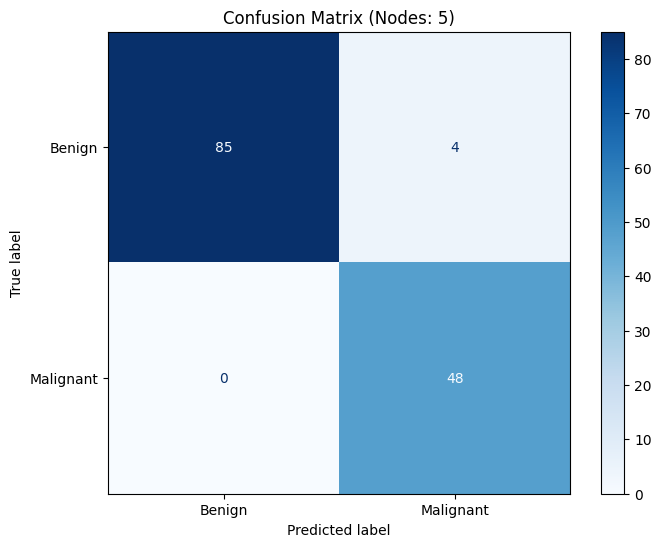

Nodes: 5, Test Accuracy: 0.9708029197080292


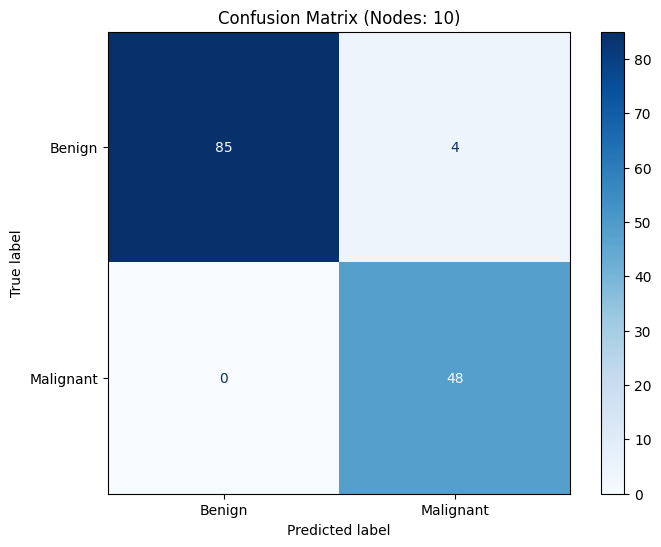

Nodes: 10, Test Accuracy: 0.9708029197080292


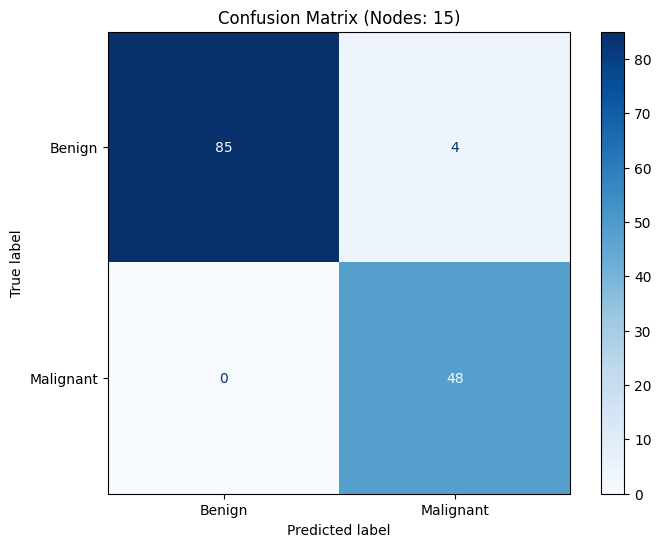

Nodes: 15, Test Accuracy: 0.9708029197080292


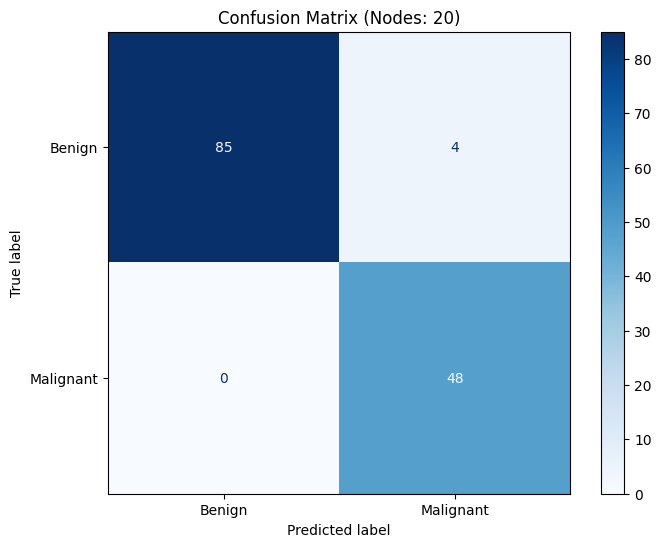

Nodes: 20, Test Accuracy: 0.9708029197080292


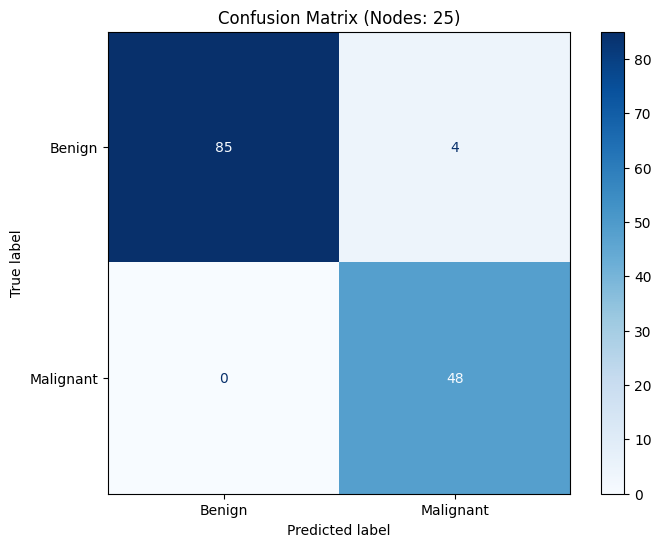

Nodes: 25, Test Accuracy: 0.9708029197080292


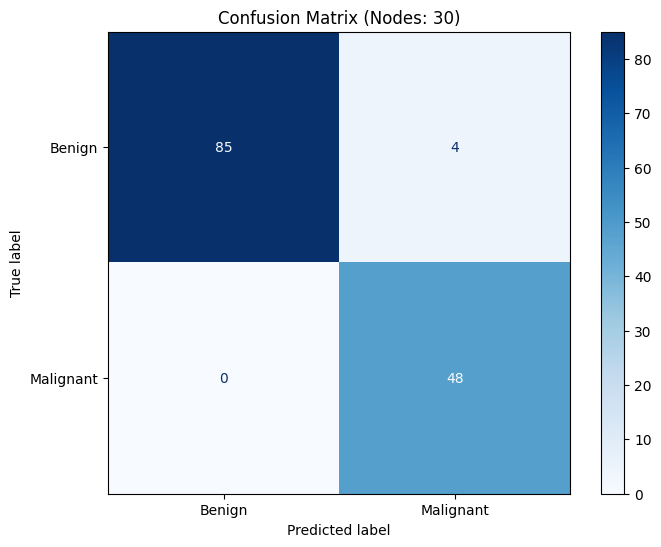

Nodes: 30, Test Accuracy: 0.9708029197080292


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# To create and train a neural network with varying nodes in one hidden layer
nodes_list = [5, 10, 15, 20, 25, 30]
for nodes in nodes_list:
    clf = MLPClassifier(hidden_layer_sizes=(nodes,), max_iter=10000)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a ConfusionMatrixDisplay object for visualization
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix (Nodes: {nodes})')
    plt.show()

    print(f"Nodes: {nodes}, Test Accuracy: {accuracy}")



Visualization for a neural network with a number of hidden layers (up to 10) while keeping the number of neurons per layer constant.

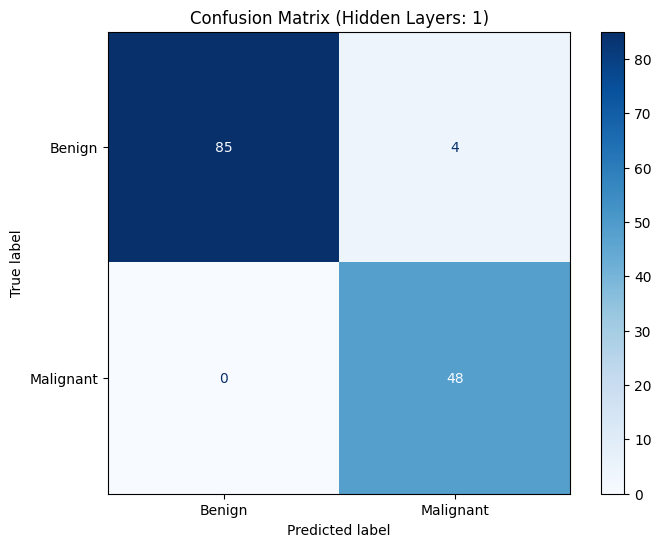

Hidden Layers: 1, Test Accuracy: 0.9708029197080292


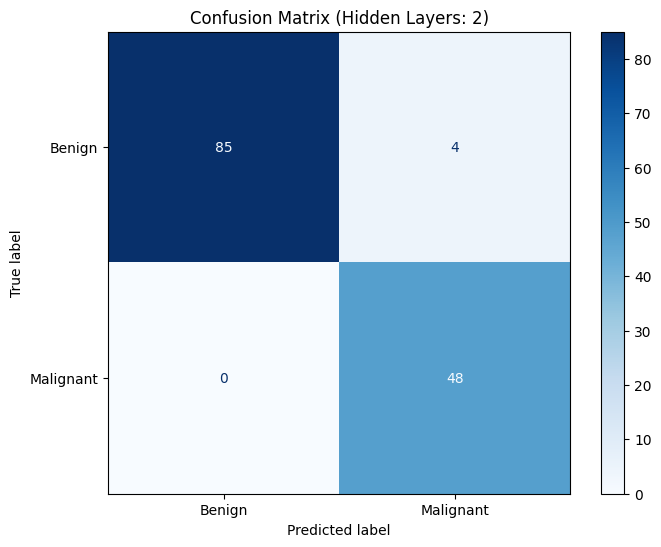

Hidden Layers: 2, Test Accuracy: 0.9708029197080292


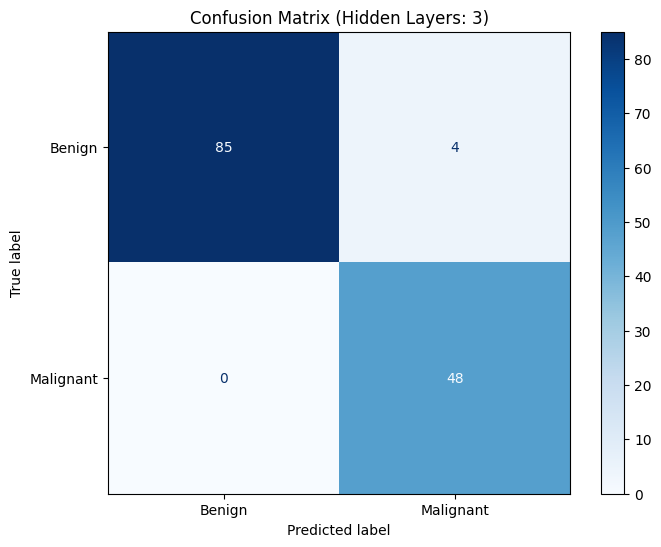

Hidden Layers: 3, Test Accuracy: 0.9708029197080292


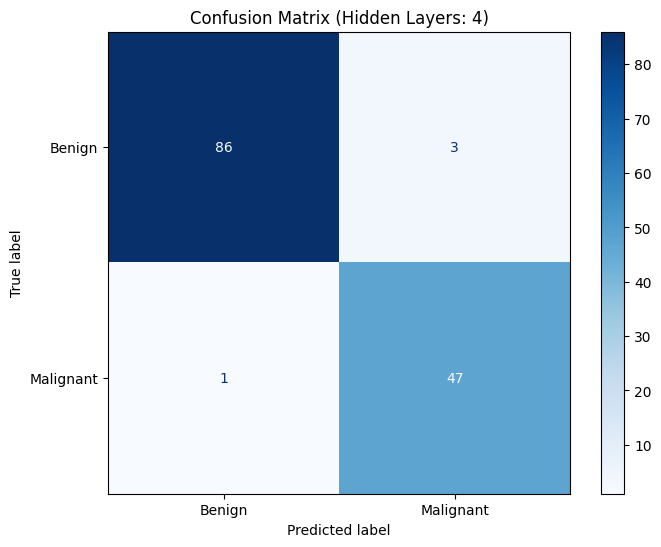

Hidden Layers: 4, Test Accuracy: 0.9708029197080292


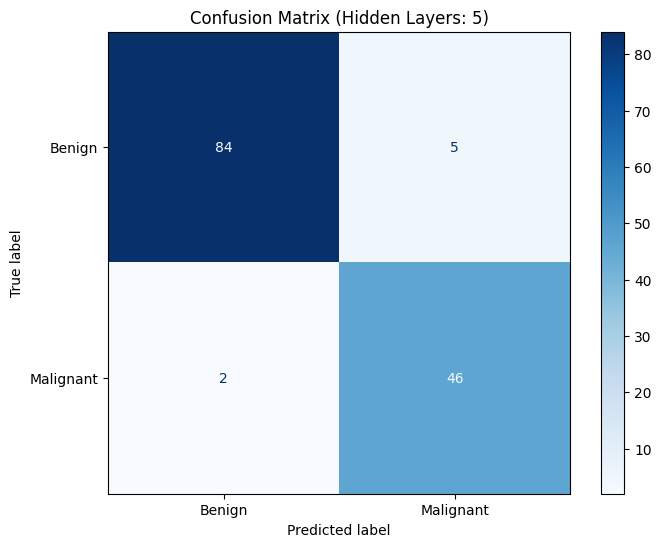

Hidden Layers: 5, Test Accuracy: 0.948905109489051


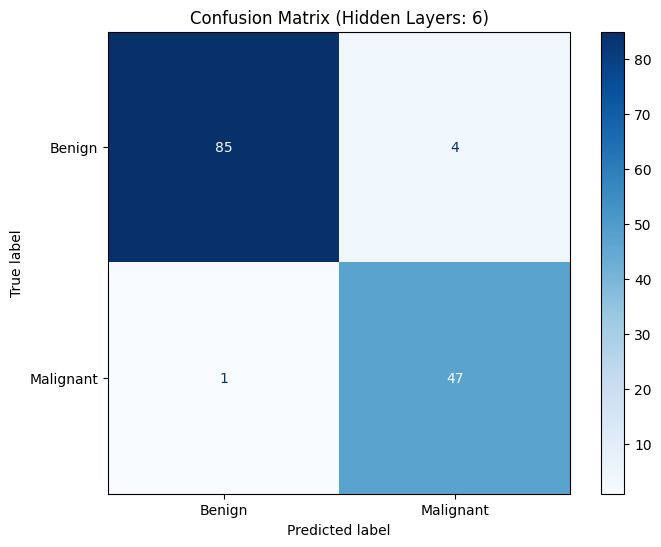

Hidden Layers: 6, Test Accuracy: 0.9635036496350365


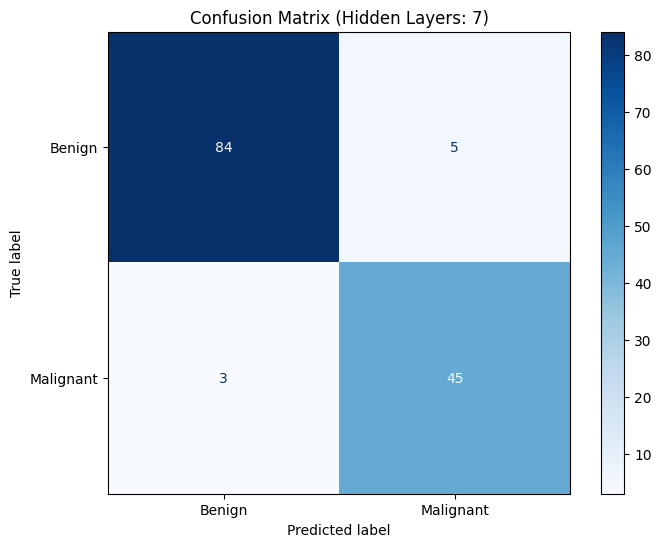

Hidden Layers: 7, Test Accuracy: 0.9416058394160584


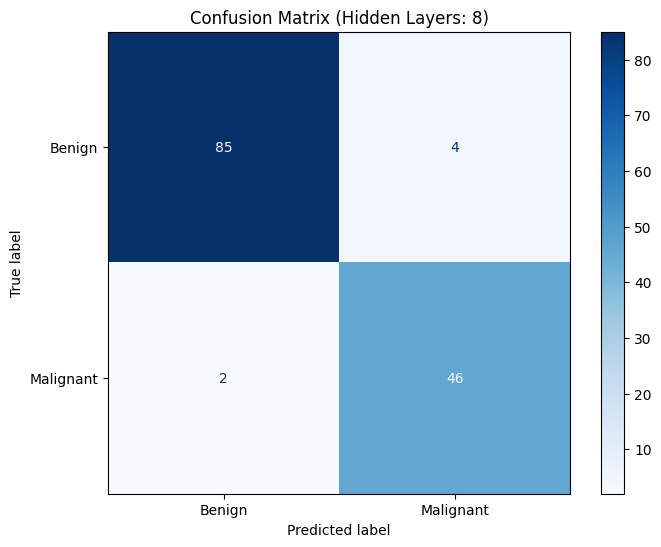

Hidden Layers: 8, Test Accuracy: 0.9562043795620438


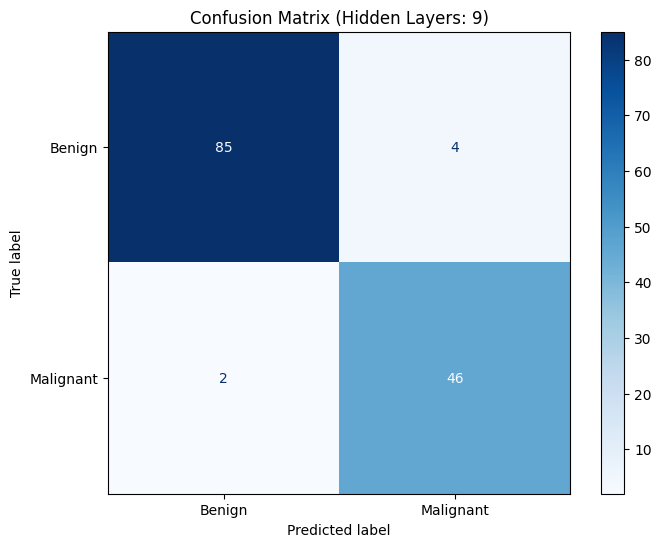

Hidden Layers: 9, Test Accuracy: 0.9562043795620438


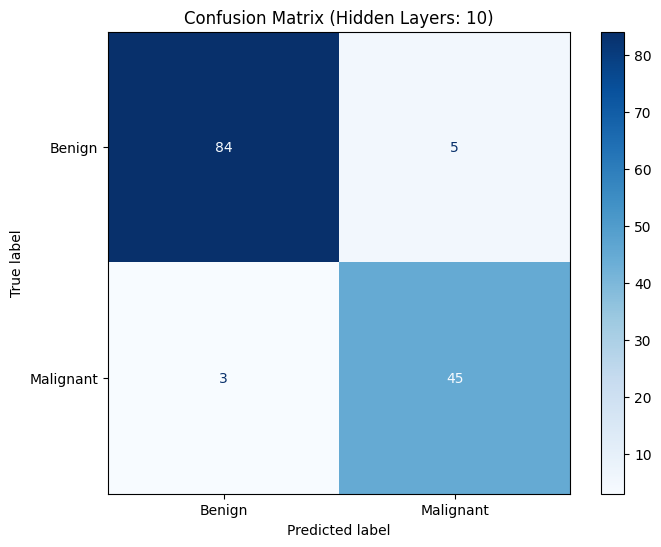

Hidden Layers: 10, Test Accuracy: 0.9416058394160584


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# number of neurons per layer
neurons_per_layer = 10

# maximum number of hidden layers
max_hidden_layers = 10

for num_layers in range(1, max_hidden_layers + 1):
    # Create a tuple with 'num_layers' elements, each element representing 'neurons_per_layer'
    hidden_layer_sizes = (neurons_per_layer,) * num_layers

    # Create and train the neural network
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=10000)
    clf.fit(X_train, y_train)

    # Evaluate the network's performance on the test set
    accuracy = clf.score(X_test, y_test)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a ConfusionMatrixDisplay object for visualization
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix (Hidden Layers: {num_layers})')
    plt.show()

    print(f"Hidden Layers: {num_layers}, Test Accuracy: {accuracy}")


Visualization of neural network with 2 hidden layers, each containing 10 neurons, and 3 different activation functions (e.g., 'relu', 'tanh', 'sigmoid') for the hidden layers.

5/5 [==============================] - 0s 2ms/step


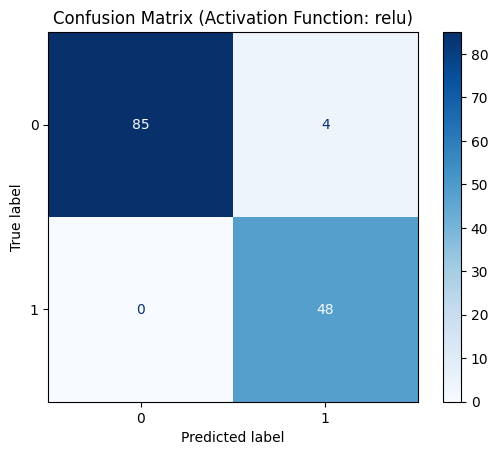

5/5 [==============================] - 0s 2ms/step


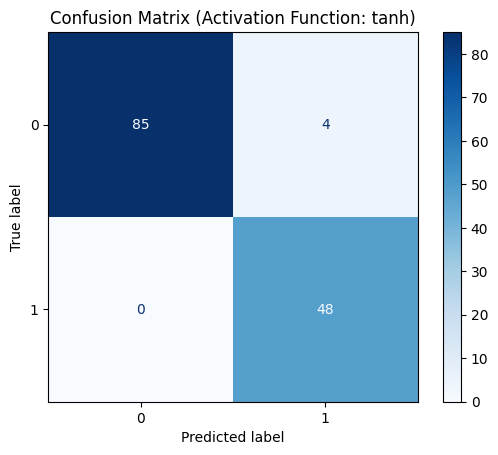

5/5 [==============================] - 0s 2ms/step


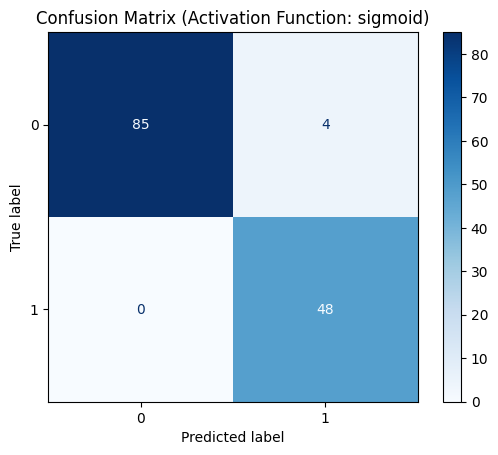

Activation Function: relu, Accuracy: 0.5360434759443764
Activation Function: tanh, Accuracy: 0.5360434759443764
Activation Function: sigmoid, Accuracy: 0.5360434759443764
The best activation function is: relu


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define a function to create and compile a neural network with a given activation function
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation=activation_function))
    model.add(Dense(10, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# List of activation functions to try
activation_functions = ['relu', 'tanh', 'sigmoid']

# Dictionary to store results
results = {}

# Iterate through activation functions and train models
for activation_function in activation_functions:
    model = create_model(activation_function)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions on the test data
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a ConfusionMatrixDisplay object for visualization
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    # Plot the confusion matrix
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix (Activation Function: {activation_function})')
    plt.show()

    # Compute accuracy
    accuracy = (y_pred == y_test).mean()
    results[activation_function] = accuracy

# Print results
for activation_function, accuracy in results.items():
    print(f'Activation Function: {activation_function}, Accuracy: {accuracy}')

# Determine the best activation function
best_activation_function = max(results, key=results.get)
print(f'The best activation function is: {best_activation_function}')
